### Na podstawie danych z Kaggle o wynikach badań pacjentów, którym przeprowadzono także badanie na obecność SARS-Cov-2 chcę sprawdzić, czy na podstawie wyników podstawowego badania krwi można stwierdzić, czy pacjent może być zarażony SARS-Cov-2

# Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Praca nad danymi

### Wczytanie danych z arkusza kalkulacyjnego

In [2]:
data = pd.read_excel('dataset.xlsx')

In [3]:
data.head(20)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


## Usunięcie column z wynikami badań innych niż podstawowe badanie krwi

In [5]:
data = data.iloc[:, 0:20]
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data.drop(['Patient ID'], axis=1)

## Usunięcie niekompletnych wyników 

In [7]:
data = data.dropna()

In [8]:
data

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
8,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
15,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
18,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
22,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,negative,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
5614,19,negative,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
5615,15,negative,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
5618,17,negative,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160


In [9]:
data.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,11.142140,0.095318,0.070234,0.048495,0.003075,0.005635,0.006570,-0.000018,-0.009439,-0.000817,0.010023,0.006673,0.000986,0.022934,0.003968,0.021765,-0.003682,-0.019338
std,5.691234,0.293899,0.255755,0.214990,1.002429,1.001255,0.994752,1.001674,0.987838,1.002535,0.991957,1.000308,1.002957,0.950538,1.002782,0.954994,0.998055,0.969622
min,0.000000,0.000000,0.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,-3.970608,-1.865070,-5.431808,-2.020303,-1.140144,-5.937604,-0.835508,-4.580812,-2.163721,-1.598094
25%,7.000000,0.000000,0.000000,0.000000,-0.518807,-0.523588,-0.605346,-0.662483,-0.567950,-0.737104,-0.552476,-0.635863,-0.529226,-0.501356,-0.666950,-0.514813,-0.614192,-0.625073
50%,12.000000,0.000000,0.000000,0.000000,0.053407,0.040316,-0.109154,-0.101517,0.013852,-0.014267,-0.054585,-0.208705,-0.223767,0.125903,-0.329835,0.076059,-0.115191,-0.182790
75%,16.000000,0.000000,0.000000,0.000000,0.717175,0.729532,0.531498,0.683835,0.661768,0.597692,0.642463,0.458470,0.387152,0.596348,0.344395,0.626871,0.488863,0.325834
max,19.000000,1.000000,1.000000,1.000000,2.662704,2.671868,9.532034,3.713052,3.645706,3.764100,3.331071,4.522042,11.078219,4.098546,8.350876,3.410980,4.533397,6.982184


## Zresetowanie indeksów

In [10]:
data = data.reset_index(drop = True)

In [11]:
data

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
1,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,19,negative,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
594,19,negative,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
595,15,negative,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
596,17,negative,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160


##  Zamiana wartości typu string na wartości liczbowe

In [12]:
data['SARS-Cov-2 exam result'] = data['SARS-Cov-2 exam result'].map({'negative': 0, 'positive': 1})
data

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
1,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,19,0,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
594,19,0,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
595,15,0,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
596,17,0,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160


In [13]:
data.describe()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,11.142140,0.135452,0.095318,0.070234,0.048495,0.003075,0.005635,0.006570,-0.000018,-0.009439,-0.000817,0.010023,0.006673,0.000986,0.022934,0.003968,0.021765,-0.003682,-0.019338
std,5.691234,0.342492,0.293899,0.255755,0.214990,1.002429,1.001255,0.994752,1.001674,0.987838,1.002535,0.991957,1.000308,1.002957,0.950538,1.002782,0.954994,0.998055,0.969622
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,-3.970608,-1.865070,-5.431808,-2.020303,-1.140144,-5.937604,-0.835508,-4.580812,-2.163721,-1.598094
25%,7.000000,0.000000,0.000000,0.000000,0.000000,-0.518807,-0.523588,-0.605346,-0.662483,-0.567950,-0.737104,-0.552476,-0.635863,-0.529226,-0.501356,-0.666950,-0.514813,-0.614192,-0.625073
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.053407,0.040316,-0.109154,-0.101517,0.013852,-0.014267,-0.054585,-0.208705,-0.223767,0.125903,-0.329835,0.076059,-0.115191,-0.182790
75%,16.000000,0.000000,0.000000,0.000000,0.000000,0.717175,0.729532,0.531498,0.683835,0.661768,0.597692,0.642463,0.458470,0.387152,0.596348,0.344395,0.626871,0.488863,0.325834
max,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704,2.671868,9.532034,3.713052,3.645706,3.764100,3.331071,4.522042,11.078219,4.098546,8.350876,3.410980,4.533397,6.982184


##  Narysowanie wykresów wyników testów na SARS-Cov-2 w funkcji poszczególnych parametrów badania krwi

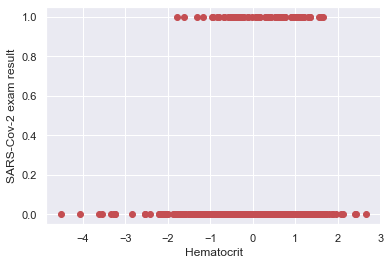

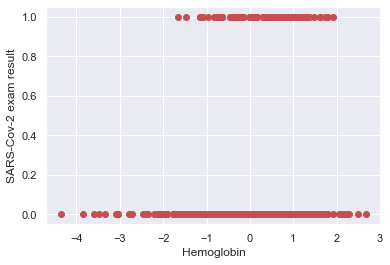

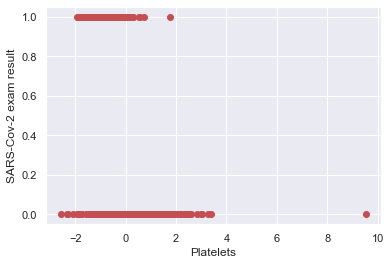

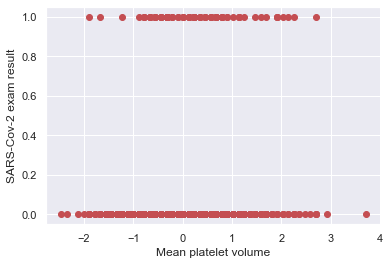

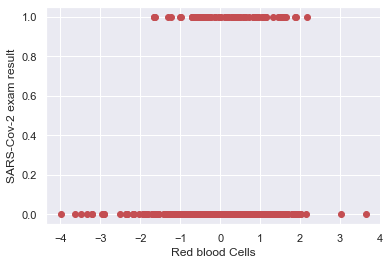

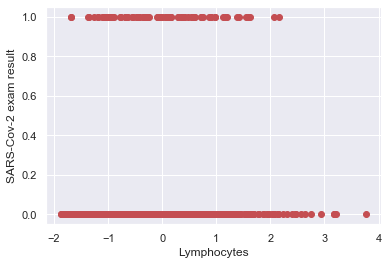

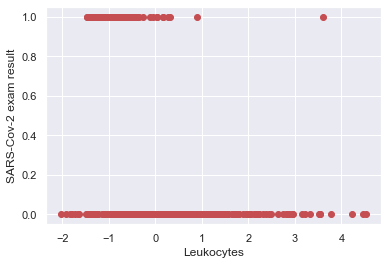

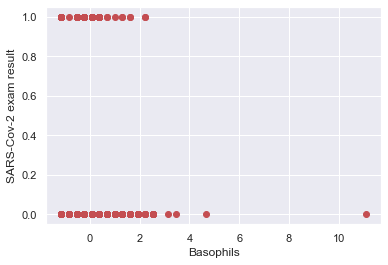

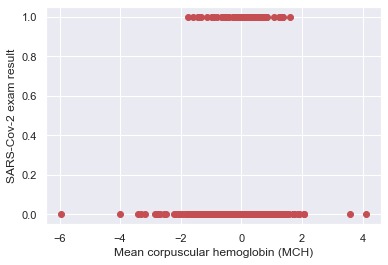

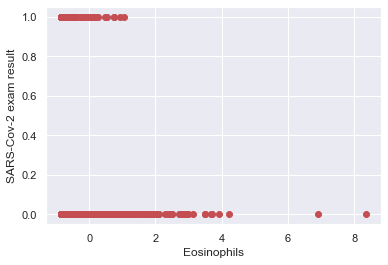

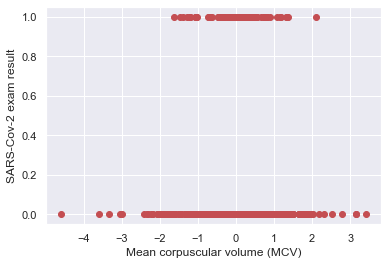

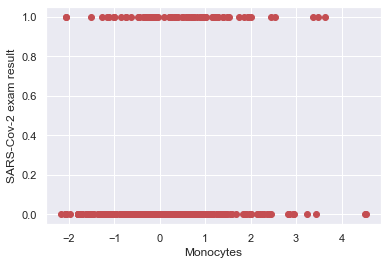

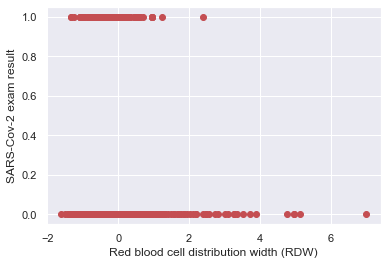

In [78]:
plt.plot(data['Hematocrit'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Hematocrit')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Hemoglobin'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Hemoglobin')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Platelets'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Platelets')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Mean platelet volume '], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Mean platelet volume')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Red blood Cells'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Red blood Cells')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Lymphocytes'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Lymphocytes')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()


plt.plot(data['Leukocytes'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Leukocytes')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Basophils'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Basophils')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Mean corpuscular hemoglobin (MCH)'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Mean corpuscular hemoglobin (MCH)')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Eosinophils'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Eosinophils')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Mean corpuscular volume (MCV)'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Mean corpuscular volume (MCV)')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Monocytes'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Monocytes')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(data['Red blood cell distribution width (RDW)'], data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Red blood cell distribution width (RDW)')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()


## Usunięcie wartości odstających

In [15]:
q_platelets = data["Platelets"].quantile(0.9)
q_basophils = data["Basophils"].quantile(0.9)
q_eosinophils = data["Eosinophils"].quantile(0.9)

clean_data = data[data["Platelets"] < q_platelets]
clean_data = data[data["Basophils"] < q_basophils]
clean_data = data[data["Eosinophils"] < q_eosinophils]

In [16]:
clean_data.describe()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,11.162011,0.150838,0.098696,0.074488,0.048417,0.003623,0.011497,-0.047948,0.025719,-0.002924,-0.031436,0.031085,0.018437,-0.065064,0.023599,-0.256464,0.011662,-0.005394,-0.020373
std,5.681028,0.358225,0.298532,0.262808,0.214846,1.002093,0.999545,0.901128,1.004520,0.996942,1.018330,0.995471,1.018745,0.988396,0.956216,0.526777,0.964011,1.026843,0.939774
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,-3.970608,-1.865070,-5.431808,-2.020303,-1.140144,-5.937604,-0.835508,-4.580812,-2.163721,-1.598094
25%,7.000000,0.000000,0.000000,0.000000,0.000000,-0.518807,-0.523588,-0.630469,-0.662483,-0.567950,-0.773352,-0.552476,-0.637255,-0.834685,-0.501356,-0.709090,-0.514813,-0.640455,-0.625073
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.053407,0.102972,-0.153121,-0.101517,0.013852,-0.065441,0.044991,-0.192008,-0.223767,0.125903,-0.414114,0.046015,-0.141454,-0.182790
75%,16.000000,0.000000,0.000000,0.000000,0.000000,0.717175,0.729532,0.500094,0.683835,0.666176,0.582766,0.742040,0.473079,0.387152,0.596348,0.091559,0.626871,0.515126,0.347948
max,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704,2.671868,3.376748,3.713052,3.645706,3.764100,3.331071,4.522042,11.078219,4.098546,1.229322,3.410980,4.533397,5.124598


## Ponowne narysowanie wykresów po usunięciu wartości odstających

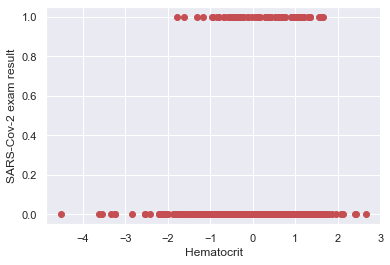

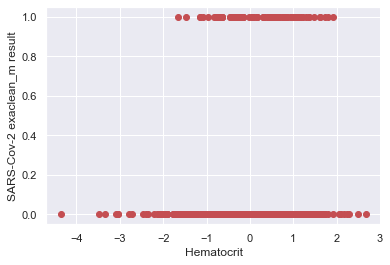

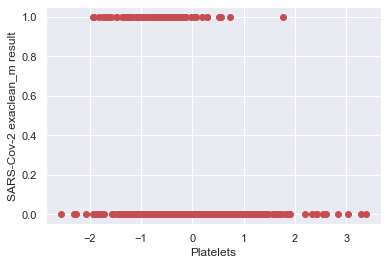

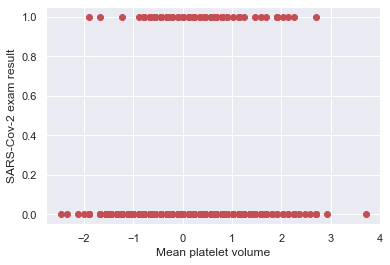

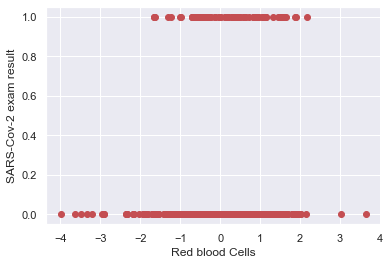

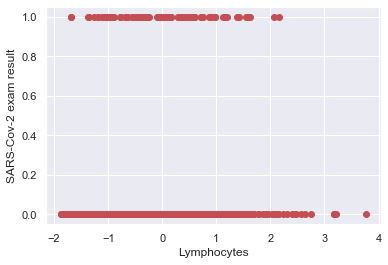

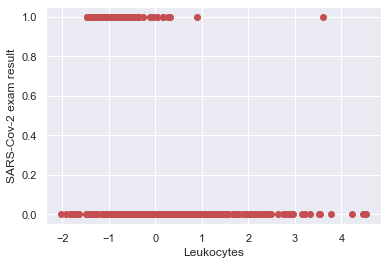

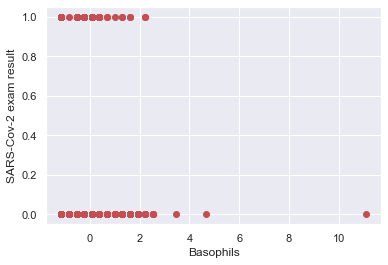

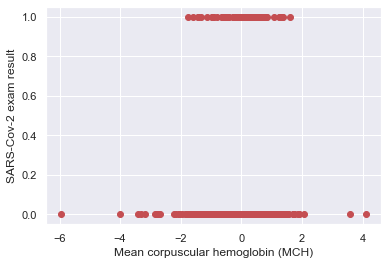

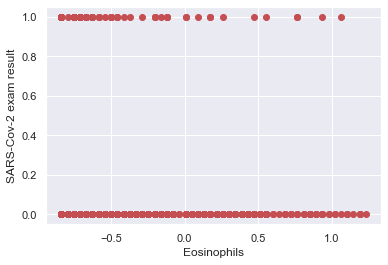

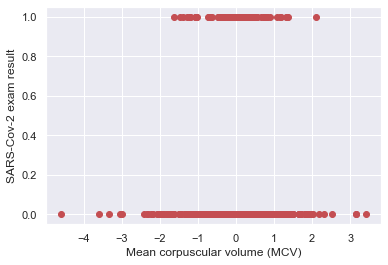

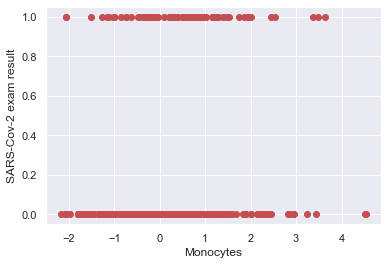

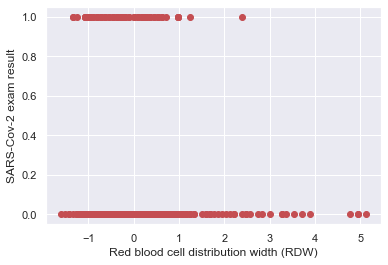

In [17]:
plt.plot(clean_data['Hematocrit'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Hematocrit')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Hemoglobin'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Hematocrit')
plt.ylabel('SARS-Cov-2 exaclean_m result')
plt.show()

plt.plot(clean_data['Platelets'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Platelets')
plt.ylabel('SARS-Cov-2 exaclean_m result')
plt.show()

plt.plot(clean_data['Mean platelet volume '], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Mean platelet volume')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Red blood Cells'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Red blood Cells')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Lymphocytes'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Lymphocytes')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()


plt.plot(clean_data['Leukocytes'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Leukocytes')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Basophils'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Basophils')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Mean corpuscular hemoglobin (MCH)'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Mean corpuscular hemoglobin (MCH)')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Eosinophils'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Eosinophils')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Mean corpuscular volume (MCV)'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Mean corpuscular volume (MCV)')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Monocytes'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Monocytes')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()

plt.plot(clean_data['Red blood cell distribution width (RDW)'], clean_data['SARS-Cov-2 exam result'], 'ro')
plt.xlabel('Red blood cell distribution width (RDW)')
plt.ylabel('SARS-Cov-2 exam result')
plt.show()


### Na powyższych wykresach nie jest widoczna korelacja na między poziomiem poszczególnych parametrów a wynikiem testu na SARS-Cov-2. Jednak można zauważyć, że u osób zarażonych niektóre parametry mieszczą się w mniejszych przedziałach niż u osób zdrowych. Może to być związane z mniejszą próbką danych osób zarażonych w stosunku do osób niezarażonych. Mimo to zdecydowano się na sprawdzenie kilku prostych modeli predykcyjnych.

#  

# Modele predykcyjne

## Przygotowanie danych

### Importowanie bibliotek

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Usunięcie danych niepotrzebnych w wektorze uczącym. Wektor uczący składa się z danych o wieku i wyników badania krwi

In [19]:
clean_data = clean_data.drop(['Patient addmited to regular ward (1=yes, 0=no)',
                            'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                             'Patient addmited to intensive care unit (1=yes, 0=no)'], axis = 1)

In [20]:
x = clean_data.drop(['SARS-Cov-2 exam result'], axis = 1)

In [21]:
y = clean_data['SARS-Cov-2 exam result']

In [22]:
x

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
1,1,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,9,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,11,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,9,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
5,13,1.014726,0.854844,-0.178244,0.796029,0.489872,-0.730707,-0.353319,-0.075131,2.525365,0.544077,0.217977,0.767079,0.068652,0.171035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,19,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
594,19,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
595,15,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
596,17,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160


In [23]:
y

1      0
2      0
3      0
4      0
5      0
      ..
593    0
594    0
595    0
596    0
597    1
Name: SARS-Cov-2 exam result, Length: 537, dtype: int64

## Skalowanie danych

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
x_scaled = scaler.transform(x)

In [27]:
x_scaled

array([[-1.79043065, -1.57348032, -0.78679921, ..., -1.39930237,
         0.07217727, -1.02090466],
       [-0.38092175, -0.75044569, -0.59857014, ...,  1.72019915,
         1.2497997 , -1.11511709],
       [-0.02854452,  0.9870705 ,  0.78177483, ...,  0.61797468,
        -0.20942822,  0.20386489],
       ...,
       [ 0.67620993,  0.71272558,  1.09548964, ..., -0.00592561,
         0.89139295, -1.20933053],
       [ 1.02858715, -3.24241055, -2.79457385, ...,  1.44984175,
         1.35220178, -0.45562611],
       [ 1.38096438,  0.68986386,  0.53080322, ...,  0.01487075,
         0.55858655, -0.17298686]])

## Podzielenie danych na zestaw uczący i testowy

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 365)

## Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model_logistic = LogisticRegression(solver='lbfgs', random_state=0).fit(x_train, y_train)

In [32]:
y_pred = model_logistic.predict(x_test)

In [33]:
y_probability = model_logistic.predict_proba(x_test)

In [34]:
y_probability

array([[8.36274388e-01, 1.63725612e-01],
       [9.77582341e-01, 2.24176593e-02],
       [9.92273044e-01, 7.72695561e-03],
       [9.88227127e-01, 1.17728727e-02],
       [5.35132658e-01, 4.64867342e-01],
       [9.88828283e-01, 1.11717174e-02],
       [9.02323882e-01, 9.76761184e-02],
       [9.41933768e-01, 5.80662319e-02],
       [8.24488179e-01, 1.75511821e-01],
       [9.14292661e-01, 8.57073390e-02],
       [8.00964630e-01, 1.99035370e-01],
       [2.05721230e-01, 7.94278770e-01],
       [6.46858230e-01, 3.53141770e-01],
       [9.72375221e-01, 2.76247786e-02],
       [9.78513921e-01, 2.14860792e-02],
       [9.77605651e-01, 2.23943488e-02],
       [7.62373026e-01, 2.37626974e-01],
       [9.48382420e-01, 5.16175799e-02],
       [9.81960019e-01, 1.80399809e-02],
       [3.41423594e-01, 6.58576406e-01],
       [3.76196005e-01, 6.23803995e-01],
       [9.99924165e-01, 7.58351606e-05],
       [9.99649875e-01, 3.50125339e-04],
       [8.47194851e-01, 1.52805149e-01],
       [8.034262

In [35]:
model_logistic.score(x_test, y_test)

0.8888888888888888

### Dokładność predykcji wynosi około 89%

#  

## K - Nearest neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier

###  Sprawdzenie dokładności predykcji dla różnej liczby sąsiadów

In [37]:
scores = []

for neighbors in range(1,16):
    model_knn = KNeighborsClassifier(n_neighbors=neighbors)
    model_knn.fit(x_train, y_train)
    scores.append(model_knn.score(x_test, y_test))
    
scores

[0.8148148148148148,
 0.8333333333333334,
 0.8240740740740741,
 0.8240740740740741,
 0.8148148148148148,
 0.8055555555555556,
 0.8240740740740741,
 0.8333333333333334,
 0.8240740740740741,
 0.8148148148148148,
 0.8148148148148148,
 0.8240740740740741,
 0.8240740740740741,
 0.8148148148148148,
 0.8240740740740741]

### Najwyższa dokładność predykcji w podanym przedziale liczby najbliższych sąsiadów występuje dla 2 oraz 8. Poniżej wykonano predykcję dla modelu z 2 najbliższymi sąsiadami

In [38]:
model_knn = KNeighborsClassifier(n_neighbors = 2)

In [39]:
model_knn = model_knn.fit(x_train, y_train)

In [40]:
model_knn.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [41]:
model_knn.predict_proba(x_test)

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

In [42]:
model_knn.score(x_test, y_test)

0.8333333333333334

###  Dokładność predykcji wyniosła około 83%

#  

# Support vector machines

In [43]:
from sklearn.svm import SVC

In [44]:
model_svm = SVC(gamma = 'auto')

In [45]:
model_svm = model_svm.fit(x_train, y_train)

In [46]:
model_svm.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [47]:
model_svm.score(x_test, y_test)

0.8425925925925926

### Dokładność predykcji wyniosła około 84%

#  

#  Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_tree = DecisionTreeClassifier(random_state=0)

In [50]:
model_tree = model_tree.fit(x_train, y_train)

In [51]:
model_tree.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [52]:
model_tree.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [53]:
model_tree.score(x_test, y_test)

0.8333333333333334

## Dokładność predykcji wyniosła około 83%

#  

# Artificial Neural Network

## Model 1


In [54]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [55]:
model_ann1 = Sequential()

In [56]:
model_ann1.add(Dense(20, input_dim=15, activation="tanh"))
model_ann1.add(Dense(10, activation="tanh"))
model_ann1.add(Dense(1, activation="sigmoid"))

In [57]:
model_ann1.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [58]:
model_ann1.fit(x_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
429/429 [==============================] - 0s 957us/step - loss: 0.2674 - accuracy: 0.5431
Epoch 2/500
429/429 [==============================] - 0s 135us/step - loss: 0.2333 - accuracy: 0.6200
Epoch 3/500
429/429 [==============================] - 0s 120us/step - loss: 0.2047 - accuracy: 0.6760
Epoch 4/500
429/429 [==============================] - 0s 136us/step - loss: 0.1815 - accuracy: 0.7110
Epoch 5/500
429/429 [==============================] - 0s 196us/step - loss: 0.1636 - accuracy: 0.7599
Epoch 6/500
429/429 [==============================] - 0s 199us/step - loss: 0.1500 - accuracy: 0.7925
Epoch 7/500
429/429 [==============================] - 0s 213us/step - loss: 0.1397 - accuracy: 0.8228
Epoch 8/500
429/429 [==============================] - 0s 194us/step - loss: 0.1318 - accuracy: 0.8392
Epoch 9/500
429/429 [==============================] - 0s 202us/step - loss: 0.1257 - accuracy: 0.8392
Epoch 10/500
429/429 [==============================] - 0s 223us/step - l

429/429 [==============================] - 0s 199us/step - loss: 0.0703 - accuracy: 0.9091
Epoch 158/500
429/429 [==============================] - 0s 168us/step - loss: 0.0703 - accuracy: 0.9068
Epoch 159/500
429/429 [==============================] - 0s 176us/step - loss: 0.0701 - accuracy: 0.9068
Epoch 160/500
429/429 [==============================] - 0s 177us/step - loss: 0.0701 - accuracy: 0.9114
Epoch 161/500
429/429 [==============================] - 0s 198us/step - loss: 0.0700 - accuracy: 0.9068
Epoch 162/500
429/429 [==============================] - 0s 210us/step - loss: 0.0699 - accuracy: 0.9138
Epoch 163/500
429/429 [==============================] - 0s 113us/step - loss: 0.0698 - accuracy: 0.9114
Epoch 164/500
429/429 [==============================] - 0s 184us/step - loss: 0.0697 - accuracy: 0.9114
Epoch 165/500
429/429 [==============================] - 0s 210us/step - loss: 0.0696 - accuracy: 0.9091
Epoch 166/500
429/429 [==============================] - 0s 207us/ste

429/429 [==============================] - 0s 157us/step - loss: 0.0567 - accuracy: 0.9417
Epoch 314/500
429/429 [==============================] - 0s 187us/step - loss: 0.0566 - accuracy: 0.9417
Epoch 315/500
429/429 [==============================] - 0s 244us/step - loss: 0.0565 - accuracy: 0.9371
Epoch 316/500
429/429 [==============================] - 0s 219us/step - loss: 0.0565 - accuracy: 0.9371
Epoch 317/500
429/429 [==============================] - 0s 239us/step - loss: 0.0564 - accuracy: 0.9417
Epoch 318/500
429/429 [==============================] - 0s 216us/step - loss: 0.0563 - accuracy: 0.9417
Epoch 319/500
429/429 [==============================] - 0s 206us/step - loss: 0.0562 - accuracy: 0.9417
Epoch 320/500
429/429 [==============================] - 0s 204us/step - loss: 0.0561 - accuracy: 0.9417
Epoch 321/500
429/429 [==============================] - 0s 205us/step - loss: 0.0560 - accuracy: 0.9417
Epoch 322/500
429/429 [==============================] - 0s 212us/ste

429/429 [==============================] - 0s 214us/step - loss: 0.0428 - accuracy: 0.9604
Epoch 470/500
429/429 [==============================] - 0s 227us/step - loss: 0.0427 - accuracy: 0.9604
Epoch 471/500
429/429 [==============================] - 0s 219us/step - loss: 0.0427 - accuracy: 0.9580
Epoch 472/500
429/429 [==============================] - 0s 221us/step - loss: 0.0426 - accuracy: 0.9604
Epoch 473/500
429/429 [==============================] - 0s 219us/step - loss: 0.0425 - accuracy: 0.9580
Epoch 474/500
429/429 [==============================] - 0s 224us/step - loss: 0.0424 - accuracy: 0.9580
Epoch 475/500
429/429 [==============================] - 0s 231us/step - loss: 0.0423 - accuracy: 0.9604
Epoch 476/500
429/429 [==============================] - 0s 208us/step - loss: 0.0423 - accuracy: 0.9604
Epoch 477/500
429/429 [==============================] - 0s 213us/step - loss: 0.0421 - accuracy: 0.9580
Epoch 478/500
429/429 [==============================] - 0s 198us/ste

In [59]:
model_ann1.predict(x_test)

array([[4.53636587e-01],
       [7.22643221e-03],
       [3.41724651e-03],
       [6.29986776e-03],
       [6.47718012e-02],
       [3.53380176e-03],
       [4.57511954e-02],
       [9.05993879e-02],
       [7.45408088e-02],
       [1.33506566e-01],
       [6.50919452e-02],
       [9.66085553e-01],
       [1.63499862e-01],
       [6.38473546e-03],
       [6.39919639e-02],
       [4.03850898e-03],
       [1.57304391e-01],
       [1.06553715e-02],
       [6.69643702e-03],
       [9.54016507e-01],
       [7.02596247e-01],
       [1.74556009e-03],
       [2.42647436e-03],
       [3.76810700e-01],
       [4.47819978e-02],
       [3.73607934e-01],
       [5.97717892e-03],
       [6.41176581e-01],
       [4.73417230e-02],
       [1.74018499e-02],
       [1.23790791e-02],
       [7.54835876e-03],
       [1.11310527e-01],
       [2.36111894e-01],
       [8.55157897e-02],
       [6.07264936e-02],
       [6.66543515e-03],
       [3.30280572e-01],
       [6.98065162e-01],
       [2.12518796e-02],


In [60]:
score, acc = model_ann1.evaluate(x_test, y_test, batch_size = 10)

108/108 [==============================] - 0s 993us/step


In [61]:
acc

0.8240740895271301

## Dokładność predykcji Modelu 1 ANN wyniosła około 82%

##  


## Model 2

In [72]:
model_ann2 = Sequential()

In [73]:
model_ann2.add(Dense(20, input_dim=15, activation="sigmoid"))
model_ann2.add(Dense(10, activation="sigmoid"))
model_ann2.add(Dense(1, activation="sigmoid"))

In [74]:
model_ann2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [75]:
model_ann2.fit(x_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
429/429 [==============================] - 1s 1ms/step - loss: 0.7540 - accuracy: 0.3636
Epoch 2/500
429/429 [==============================] - 0s 162us/step - loss: 0.5646 - accuracy: 0.8462
Epoch 3/500
429/429 [==============================] - 0s 161us/step - loss: 0.4888 - accuracy: 0.8462
Epoch 4/500
429/429 [==============================] - 0s 149us/step - loss: 0.4558 - accuracy: 0.8462
Epoch 5/500
429/429 [==============================] - 0s 150us/step - loss: 0.4391 - accuracy: 0.8462
Epoch 6/500
429/429 [==============================] - 0s 203us/step - loss: 0.4310 - accuracy: 0.8462
Epoch 7/500
429/429 [==============================] - 0s 228us/step - loss: 0.4265 - accuracy: 0.8462
Epoch 8/500
429/429 [==============================] - 0s 242us/step - loss: 0.4240 - accuracy: 0.8462
Epoch 9/500
429/429 [==============================] - 0s 232us/step - loss: 0.4225 - accuracy: 0.8462
Epoch 10/500
429/429 [==============================] - 0s 226us/step - los

429/429 [==============================] - 0s 273us/step - loss: 0.3293 - accuracy: 0.8438
Epoch 158/500
429/429 [==============================] - 0s 268us/step - loss: 0.3285 - accuracy: 0.8438
Epoch 159/500
429/429 [==============================] - 0s 258us/step - loss: 0.3280 - accuracy: 0.8438
Epoch 160/500
429/429 [==============================] - 0s 245us/step - loss: 0.3274 - accuracy: 0.8438
Epoch 161/500
429/429 [==============================] - 0s 272us/step - loss: 0.3266 - accuracy: 0.8438
Epoch 162/500
429/429 [==============================] - 0s 253us/step - loss: 0.3260 - accuracy: 0.8462
Epoch 163/500
429/429 [==============================] - 0s 247us/step - loss: 0.3253 - accuracy: 0.8462
Epoch 164/500
429/429 [==============================] - 0s 254us/step - loss: 0.3247 - accuracy: 0.8462
Epoch 165/500
429/429 [==============================] - 0s 242us/step - loss: 0.3240 - accuracy: 0.8462
Epoch 166/500
429/429 [==============================] - 0s 263us/ste

429/429 [==============================] - 0s 280us/step - loss: 0.2859 - accuracy: 0.8811
Epoch 313/500
429/429 [==============================] - 0s 261us/step - loss: 0.2859 - accuracy: 0.8811
Epoch 314/500
429/429 [==============================] - 0s 267us/step - loss: 0.2857 - accuracy: 0.8811
Epoch 315/500
429/429 [==============================] - 0s 245us/step - loss: 0.2858 - accuracy: 0.8811
Epoch 316/500
429/429 [==============================] - 0s 238us/step - loss: 0.2857 - accuracy: 0.8811
Epoch 317/500
429/429 [==============================] - 0s 236us/step - loss: 0.2855 - accuracy: 0.8834
Epoch 318/500
429/429 [==============================] - 0s 239us/step - loss: 0.2854 - accuracy: 0.8811
Epoch 319/500
429/429 [==============================] - 0s 241us/step - loss: 0.2855 - accuracy: 0.8811
Epoch 320/500
429/429 [==============================] - 0s 240us/step - loss: 0.2852 - accuracy: 0.8811
Epoch 321/500
429/429 [==============================] - 0s 235us/ste

429/429 [==============================] - 0s 245us/step - loss: 0.2763 - accuracy: 0.8834
Epoch 468/500
429/429 [==============================] - 0s 259us/step - loss: 0.2762 - accuracy: 0.8834
Epoch 469/500
429/429 [==============================] - 0s 255us/step - loss: 0.2763 - accuracy: 0.8811
Epoch 470/500
429/429 [==============================] - 0s 264us/step - loss: 0.2762 - accuracy: 0.8834
Epoch 471/500
429/429 [==============================] - 0s 278us/step - loss: 0.2761 - accuracy: 0.8811
Epoch 472/500
429/429 [==============================] - 0s 262us/step - loss: 0.2761 - accuracy: 0.8811
Epoch 473/500
429/429 [==============================] - 0s 264us/step - loss: 0.2759 - accuracy: 0.8811
Epoch 474/500
429/429 [==============================] - 0s 263us/step - loss: 0.2759 - accuracy: 0.8811
Epoch 475/500
429/429 [==============================] - 0s 260us/step - loss: 0.2759 - accuracy: 0.8811
Epoch 476/500
429/429 [==============================] - 0s 258us/ste

In [76]:
score, acc = model_ann2.evaluate(x_test, y_test, batch_size = 10)

108/108 [==============================] - 0s 1ms/step


In [77]:
acc

0.8796296119689941

## Dokładność predykcji wyniosła około 88%

#  



## Ze stworzonych modeli predykcyjnych najwyższy wynik osiągnął model regresji - około 89%. Model 2 sztucznej sieci neuronowej osiągnął dokładność predykcji około 88%. Wynika z tego, że istnieją korelacje między wynikami badania krwi a zarażeniem przez SARS-Cov-2. Aby potwierdzić ten wniosek, należałoby wykonać analizę na znacznie większej populacji. Powinno się także sprawdzić, czy inne choroby nie dają podobnych wyników badań krwi. 